# Worksheet 6, Excercise 3

Lecture   : Scientific Computing I <br/>
Worksheet : 6                      <br/>
Excercise : 3                      <br/>

Original python script:                              <br/>
Author    : Denis Jarema    ;  Benjamin Rüth        <br/>
Date      : November 14, 2014;  November 25, 2015    <br/>

jupyter notebook modified version:                  <br/>
Author    : Pei-Hsuan Huang                         <br/>
Date      : December 10, 2017

In [1]:
from pylab import *
import numpy as np

# EX.3 b

### Define a function for computing jacobian

In [2]:
def compute_jacobian(x):
    return np.array([[36 - 24 * x[0] - 2 * x[1], -2 * x[0]],
                     [-6 * x[1], 30 - 12 * x[1] - 6 * x[0]]])

In [3]:
x_crit  = 4 * [None]
x_crit[0] = np.array([0, 0])
x_crit[1] = np.array([0, 5])
x_crit[2] = np.array([3, 0])
x_crit[3] = np.array([2.6, 2.4])

j_crit = 4 * [None]

for i in range(4):
    j_crit[i] = compute_jacobian(x_crit[i])
    lam, v = np.linalg.eig(j_crit[i])
    print("for x_crit:" + str(x_crit[i]))
    print( "we get j_crit:\n" + str(j_crit[i]))
    print("with eigenvalues:" + str(lam))
    print( "\n")


for x_crit:[0 0]
we get j_crit:
[[36  0]
 [ 0 30]]
with eigenvalues:[36. 30.]


for x_crit:[0 5]
we get j_crit:
[[ 26   0]
 [-30 -30]]
with eigenvalues:[-30.  26.]


for x_crit:[3 0]
we get j_crit:
[[-36  -6]
 [  0  12]]
with eigenvalues:[-36.  12.]


for x_crit:[2.6 2.4]
we get j_crit:
[[-31.2  -5.2]
 [-14.4 -14.4]]
with eigenvalues:[-34.85985075 -10.74014925]




## Ex. 3 c
$$\frac{dx}{dt}=36x-12x^2-2xy$$
$$\frac{dy}{dt}=30y-6y^2-6xy$$

### Define a function for ploting the direction field

In [8]:
def plotDirectionField(X, Y, U, V, pname):
    """ simple plotting of direction fields."""
    M = sqrt(pow(U, 2) + pow(V, 2))
    U = np.divide(U,M)
    V = np.divide(V,M)
    Q = quiver( X, Y, U, V, M, units='xy', pivot='mid',
                width=0.010, scale=1/0.08, cmap=cm.gist_ncar)
    title(pname)
    xlim([x_min,x_max])
    ylim([y_min,y_max])
    xlabel(r'$x$')
    ylabel(r'$y$')
    show()

In [9]:
x_min = -0.5
x_max = 4.
y_min = -0.5
y_max = 6.

In [10]:
X,Y = meshgrid( arange(x_min,x_max,.11),arange( y_min,y_max,.11) )

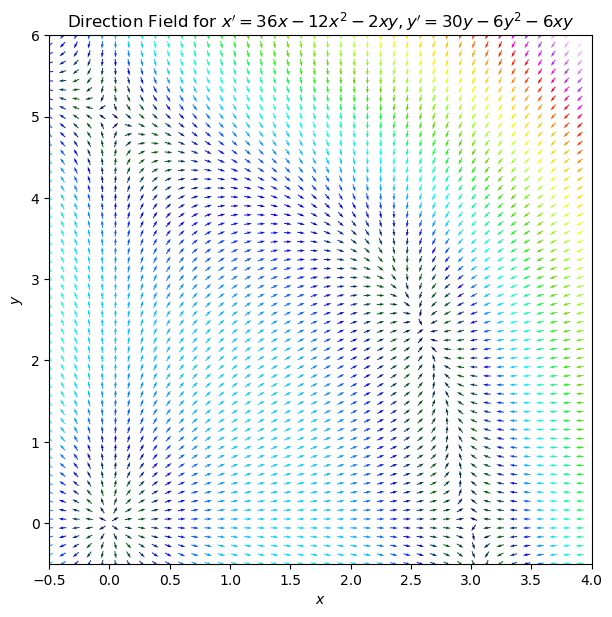

In [11]:
U = (36*X - 12*X*X - 2*X*Y)*(y_max-y_min)/(x_max-x_min)
V = 30*Y - 6*Y*Y  - 6*X*Y
f = figure(figsize=(7, 7), dpi=100)
plotDirectionField(X, Y, U, V,
                   r"Direction Field for $x'=36x-12x^2-2xy, y'=30y-6y^2-6xy$")